In [2]:
import sys
sys.path.append('D:/Learn/git/supervised-learning/model_bin')  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import linear_regression as lr

In [3]:
raw_data=pd.read_csv('../data/raw_data.csv')
features= ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
target=['quality']
X=raw_data[features]
y=raw_data[target]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.4)
X_val, X_test, y_val, y_test=train_test_split(X_test,y_test,test_size=0.3)

In [4]:
y_train.shape

(959, 1)

In [5]:
alpha=2.5e-3
epoch=4000
theta_initial=np.zeros(((X_train.shape[1]),))
b_initial=0
theta_final,b_final,cost_hist=lr.gradient_descent(X_train,theta_initial,b_initial,y_train,alpha,epoch)

(959, 11) (959, 1)
iteration    0: Cost   143.70 
iteration  400: Cost    29.83 
iteration  800: Cost    14.51 
iteration 1200: Cost    12.45 
iteration 1600: Cost    12.18 
iteration 2000: Cost    12.14 
iteration 2400: Cost    12.13 
iteration 2800: Cost    12.13 
iteration 3200: Cost    12.13 
iteration 3600: Cost    12.13 


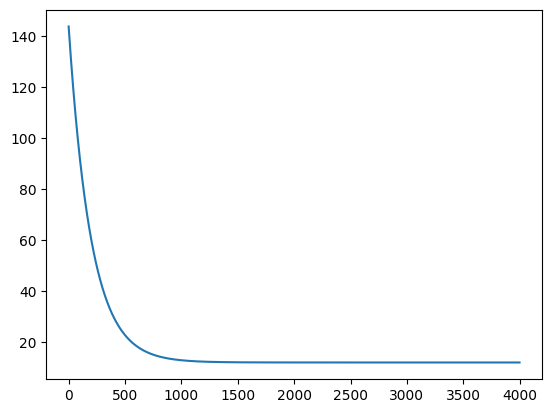

In [6]:
plt.plot(cost_hist)

In [8]:
lr.val_scores(X_val,y_val,theta_final,b_final)

(448, 11) (448, 1)


6.439920413997892